In [174]:
import pandas as pd
import numpy as np

# Loading Data

In [175]:
train = pd.read_csv("train.csv")

In [176]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [178]:
df = pd.concat([train,test],axis = 0,ignore_index=True)

In [179]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [180]:
test.shape

(418, 11)

In [181]:
train.shape

(891, 12)

# Data Analysis

### Checking for Null values

In [182]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

PassengerId
False    1309
Name: PassengerId, dtype: int64

Survived
False    891
True     418
Name: Survived, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Name
False    1309
Name: Name, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

Age
False    1046
True      263
Name: Age, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

Ticket
False    1309
Name: Ticket, dtype: int64

Fare
False    1308
True        1
Name: Fare, dtype: int64

Cabin
True     1014
False     295
Name: Cabin, dtype: int64

Embarked
False    1307
True        2
Name: Embarked, dtype: int64



### Replacing missing values in Age column with average age

In [183]:
age_avg = df["Age"].mean()
age_avg

29.881137667304014

In [184]:
df["Age"].replace(np.nan,age_avg,inplace=True)

In [185]:
df["Age"].isnull().value_counts()

False    1309
Name: Age, dtype: int64

### Replacing missing values in Fare column with average fare of Pclass to which he belonged

In [186]:
fare = df.groupby("Pclass")["Fare"].mean()

In [187]:
fare

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [188]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [189]:
df["Fare"].replace(np.nan,13.302889,inplace=True)

In [190]:
df[df["PassengerId"]==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.302889,NaN,S


### Dealing with missing values of Cabin columns

#### As missing values are more than half of the size of the column, we can drop it

In [191]:
df.drop(["Cabin"],axis=1,inplace=True)

### Dealing with missing values of Embarked columns

In [192]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [193]:
df["Embarked"].replace(np.nan,"S",inplace=True)

# Exploratory Data Analysis

In [194]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

PassengerId
False    1309
Name: PassengerId, dtype: int64

Survived
False    891
True     418
Name: Survived, dtype: int64

Pclass
False    1309
Name: Pclass, dtype: int64

Name
False    1309
Name: Name, dtype: int64

Sex
False    1309
Name: Sex, dtype: int64

Age
False    1309
Name: Age, dtype: int64

SibSp
False    1309
Name: SibSp, dtype: int64

Parch
False    1309
Name: Parch, dtype: int64

Ticket
False    1309
Name: Ticket, dtype: int64

Fare
False    1309
Name: Fare, dtype: int64

Embarked
False    1309
Name: Embarked, dtype: int64



In [195]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [196]:
df_train = df.loc[0:890,:]

In [197]:
df_tr = df.loc[0:890,:]

In [198]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [199]:
df_test = df.loc[891:,:]

In [200]:
df_te = df.loc[891:,:]

In [201]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [202]:
df_test.shape

(418, 11)

### Checking for relation between Pclass and Survival chances

In [203]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='Survived'>

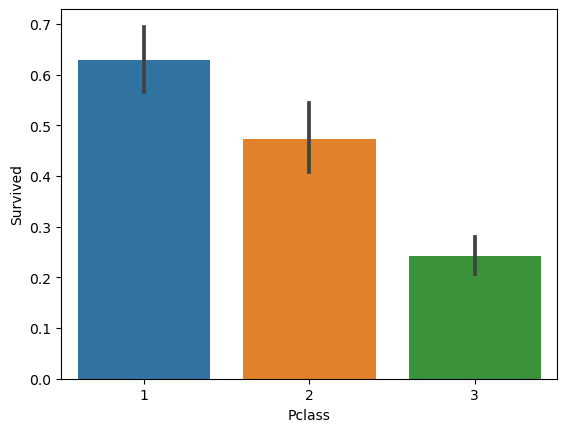

In [204]:
sns.barplot(x="Pclass",y="Survived",data=df_train)

In [205]:
from scipy.stats import chi2_contingency

In [206]:
contigency= pd.crosstab(df_train['Pclass'], df_train['Survived']) 
contigency

Survived,0.0,1.0
Pclass,,
1,80,136
2,97,87
3,372,119


In [207]:
chi2_contingency(contigency)

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

<Axes: >

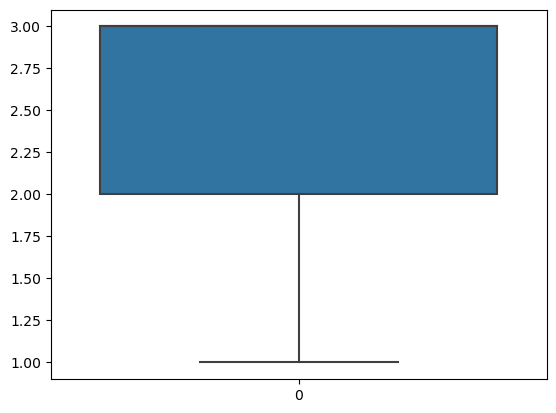

In [208]:
sns.boxplot(df_train["Pclass"])

### Checking for relation between Sex and Survival chances

In [209]:
contigency2= pd.crosstab(df_train['Sex'], df_train['Survived']) 
contigency2

Survived,0.0,1.0
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='Survived'>

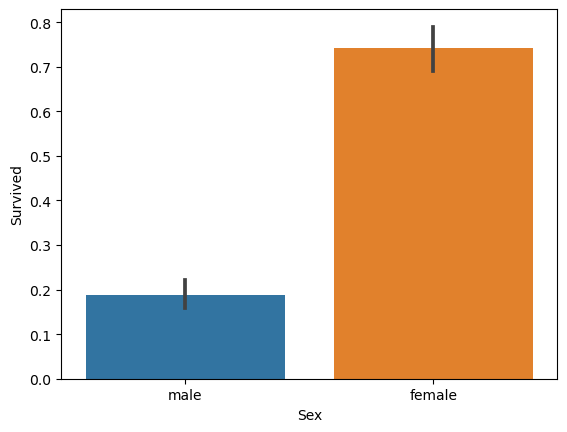

In [210]:
sns.barplot(x="Sex",y="Survived",data=df_train)

In [211]:
chi2_contingency(contigency2)

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

In [212]:
sex = pd.get_dummies(df_train["Sex"])

In [213]:
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [214]:
df_train = pd.concat([df_train,sex],axis=1)

In [215]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


In [216]:
sex = pd.get_dummies(df_test["Sex"])
sex.head()

,female,male
891,0,1
892,1,0
893,0,1
894,0,1
895,1,0


In [217]:
df_test = pd.concat([df_test,sex],axis=1)

In [218]:
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,0


In [219]:
sex = df_train["Sex"].unique().tolist()
sex

['male', 'female']

In [220]:
df_train["Sex"].replace(sex,[0,1],inplace=True)
df_test["Sex"].replace(sex,[0,1],inplace=True)

<Axes: >

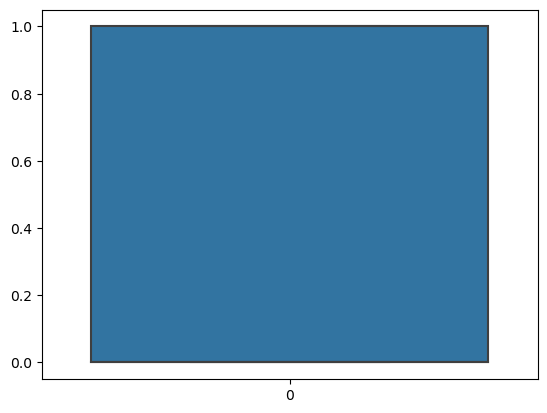

In [221]:
sns.boxplot(df_train["Sex"])

### Checking for relation between Age and Survival chances

<Axes: xlabel='Survived', ylabel='Age'>

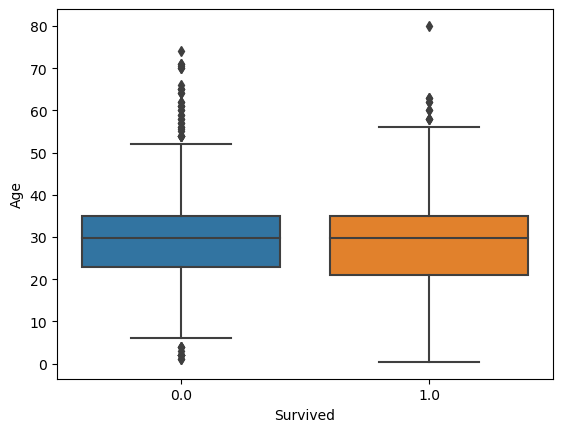

In [222]:
sns.boxplot(x="Survived",y="Age",data=df_train)

In [223]:
df_0 = df_train[df_train["Survived"]==0]
df_1 = df_train[df_train["Survived"]==1]

In [224]:
group0 = df_0["Age"]
group1 = df_1["Age"]

#### Two groups should have same variance for Anova test

In [225]:
df_0["Age"].var()

155.132458101664

In [226]:
df_1["Age"].var()

189.74977994862783

In [227]:
import scipy.stats as stats
stats.bartlett(group0,group1)

BartlettResult(statistic=4.31937085008765, pvalue=0.03768085156342066)

#### As two groups have different variance we go for welch's anova

In [228]:
import pingouin as pg 

In [229]:
pg.welch_anova(dv='Age', between='Survived', data=df_train) 

,Source,ddof1,ddof2,F,p-unc,np2
0,Survived,1,668.839381,4.216612,0.040418,0.004945


<Axes: xlabel='Age', ylabel='Survived'>

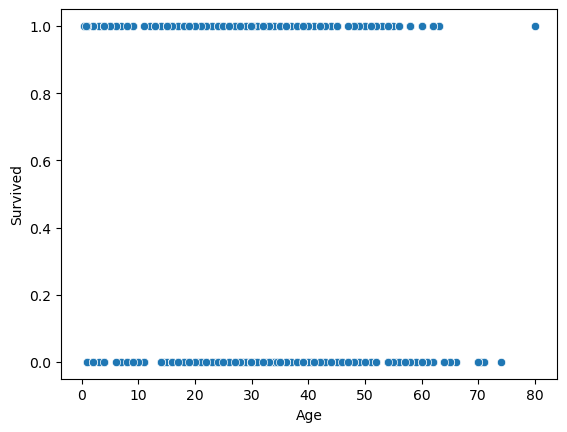

In [230]:
sns.scatterplot(x="Age",y="Survived",data=df_train)

In [231]:
df_train[df_train["Age"]>75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0,S,0,1


In [232]:
df_train.drop([630],inplace=True)

<Axes: xlabel='Age', ylabel='Survived'>

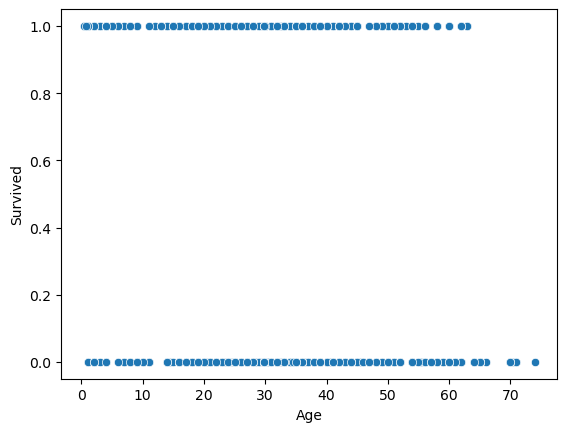

In [233]:
sns.scatterplot(x="Age",y="Survived",data=df_train)

### Checking for relation between SibSp and Survival chances

In [234]:
df_train["SibSp"].value_counts()

0    607
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [235]:
df_test["SibSp"].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

<Axes: xlabel='SibSp', ylabel='Survived'>

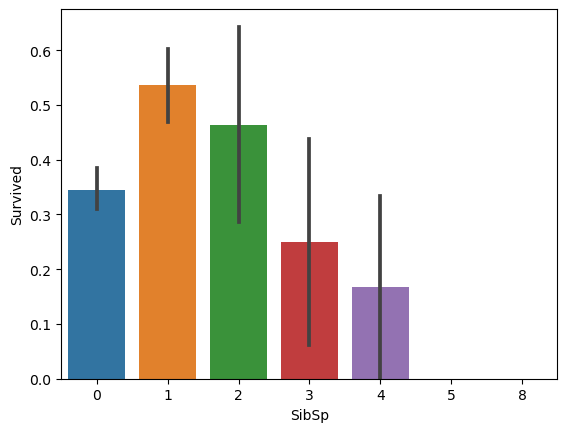

In [236]:
sns.barplot(x="SibSp",y="Survived",data=df_train)

In [237]:
contigency3= pd.crosstab(df_train['SibSp'], df_train['Survived']) 
contigency3

Survived,0.0,1.0
SibSp,,
0,398,209
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [238]:
chi2_contingency(contigency3)

Chi2ContingencyResult(statistic=37.50511685079844, pvalue=1.4034461499179912e-06, dof=6, expected_freq=array([[374.43033708, 232.56966292],
       [128.92247191,  80.07752809],
       [ 17.27191011,  10.72808989],
       [  9.86966292,   6.13033708],
       [ 11.10337079,   6.89662921],
       [  3.08426966,   1.91573034],
       [  4.31797753,   2.68202247]]))

<Axes: >

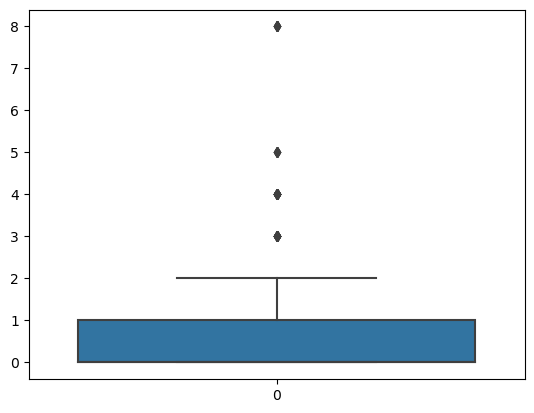

In [239]:
sns.boxplot(df_train["SibSp"])

### Checking for relation between Parch and Survival chances

In [240]:
df_train["Parch"].value_counts()

0    677
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [241]:
df_test["Parch"].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

<Axes: xlabel='Parch', ylabel='Survived'>

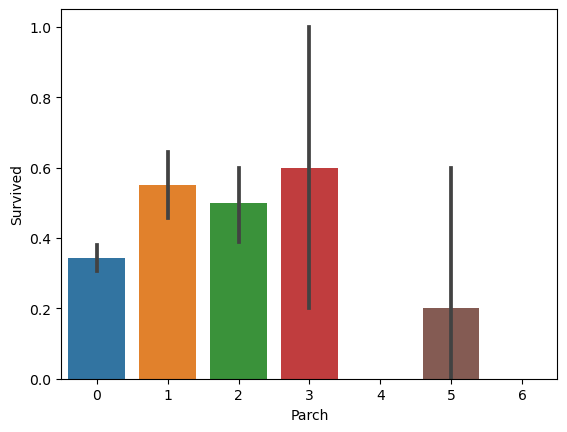

In [242]:
sns.barplot(x="Parch",y="Survived",data=df_train)

In [243]:
contigency4= pd.crosstab(df_train['Parch'], df_train['Survived']) 
contigency4

Survived,0.0,1.0
Parch,,
0,445,232
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [244]:
chi2_contingency(contigency4)

Chi2ContingencyResult(statistic=28.162068405078106, pvalue=8.758346551089976e-05, dof=6, expected_freq=array([[4.17610112e+02, 2.59389888e+02],
       [7.27887640e+01, 4.52112360e+01],
       [4.93483146e+01, 3.06516854e+01],
       [3.08426966e+00, 1.91573034e+00],
       [2.46741573e+00, 1.53258427e+00],
       [3.08426966e+00, 1.91573034e+00],
       [6.16853933e-01, 3.83146067e-01]]))

In [245]:
df_test[df_test["Parch"] == 9]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
1233,1234,NaN,3,"Sage, Mr. John George",0,29.881138,1,9,CA. 2343,69.55,S,0,1
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",1,29.881138,1,9,CA. 2343,69.55,S,1,0


<Axes: >

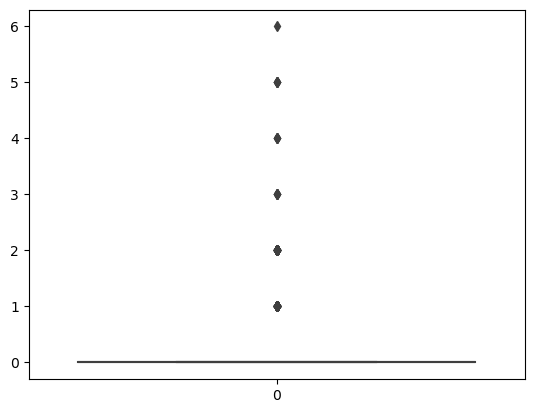

In [246]:
sns.boxplot(df_train["Parch"])

<Axes: xlabel='Parch', ylabel='Count'>

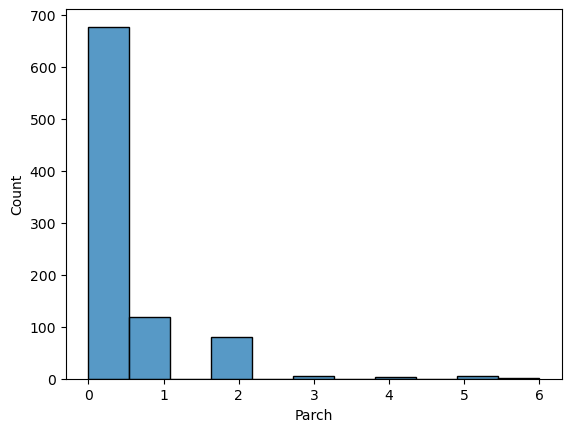

In [247]:
sns.histplot(df_train["Parch"])

### Checking for relation between Fare and Survival chances

In [248]:
df_0 = df_train[df_train["Survived"]==0]
df_1 = df_train[df_train["Survived"]==1]

In [249]:
group0 = df_0["Fare"]
group1 = df_1["Fare"]

In [250]:
df_0["Fare"].var()

985.2195092053395

In [251]:
df_1["Fare"].var()

4447.2065606872

In [252]:
stats.bartlett(group0,group1)

BartlettResult(statistic=244.25594023682885, pvalue=4.642520142246345e-55)

#### As two groups have different variance we go for welch's anova

In [253]:
pg.welch_anova(dv='Fare', between='Survived', data=df_train) 

,Source,ddof1,ddof2,F,p-unc,np2
0,Survived,1,434.898687,46.7333,2.762545e-11,0.066359


<Axes: ylabel='Frequency'>

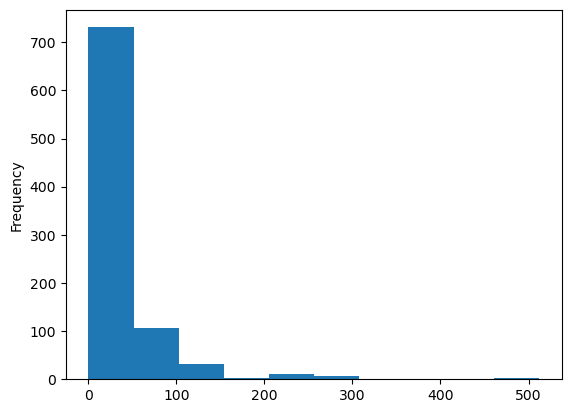

In [254]:
df_train["Fare"].plot(kind="hist")

<Axes: >

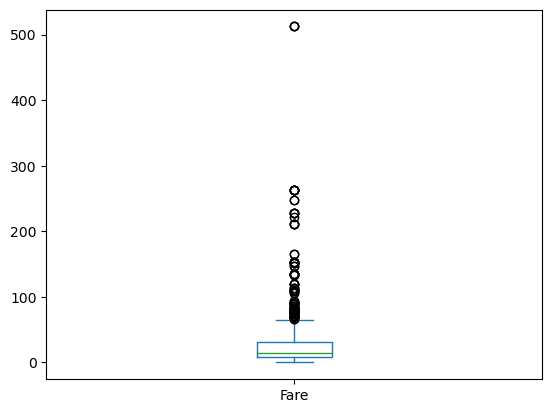

In [255]:
df_train["Fare"].plot(kind="box")

<Axes: xlabel='Fare', ylabel='Survived'>

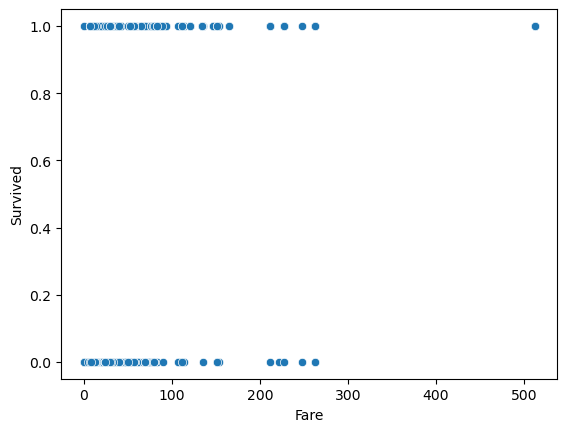

In [256]:
sns.scatterplot(x="Fare",y="Survived",data=df_train)

In [257]:
df_train[df_train["Fare"]>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
258,259,1.0,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,C,1,0
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,C,0,1
737,738,1.0,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,C,0,1


In [258]:
df_train.drop([258,679,737],inplace=True)

In [259]:
df_train[df_train["Fare"]>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male


### Checking for relation between Embarked and Survival chances

In [260]:
contigency5= pd.crosstab(df_train['Embarked'], df_train['Survived']) 
contigency5

Survived,0.0,1.0
Embarked,,
C,75,90
Q,47,30
S,427,218


In [261]:
chi2_contingency(contigency5)

Chi2ContingencyResult(statistic=24.004950323915693, pvalue=6.129023238164918e-06, dof=2, expected_freq=array([[102.12514092,  62.87485908],
       [ 47.6583991 ,  29.3416009 ],
       [399.21645998, 245.78354002]]))

<Axes: xlabel='Embarked', ylabel='Survived'>

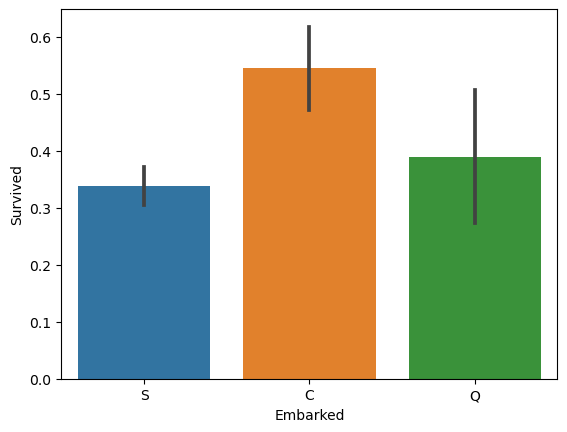

In [262]:
sns.barplot(x="Embarked",y="Survived",data=df_train)

In [263]:
embark = pd.get_dummies(df_train["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [264]:
df_train = pd.concat([df_train,embark],axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1,0,0,1


In [265]:
embark = pd.get_dummies(df_test["Embarked"])
embark.head()

,C,Q,S
891,0,1,0
892,0,0,1
893,0,1,0
894,0,0,1
895,0,0,1


In [266]:
df_test = pd.concat([df_test,embark],axis=1)
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,1,0,1,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,1,0,0,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0,1,0
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,1,0,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,1,0,0,0,1


In [267]:
embark = df_train["Embarked"].unique().tolist()
embark

['S', 'C', 'Q']

In [268]:
df_train["Embarked"].replace(embark,[0,1,2],inplace=True)
df_test["Embarked"].replace(embark,[0,1,2],inplace=True)

<Axes: >

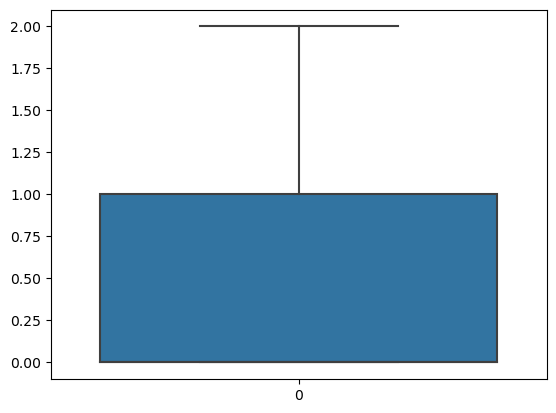

In [269]:
sns.boxplot(df_train["Embarked"])

In [270]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,0,1


C:\Users\saima\AppData\Local\Temp\ipykernel_12600\974882336.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot = True,linewidths=5,ax=ax)


<Axes: >

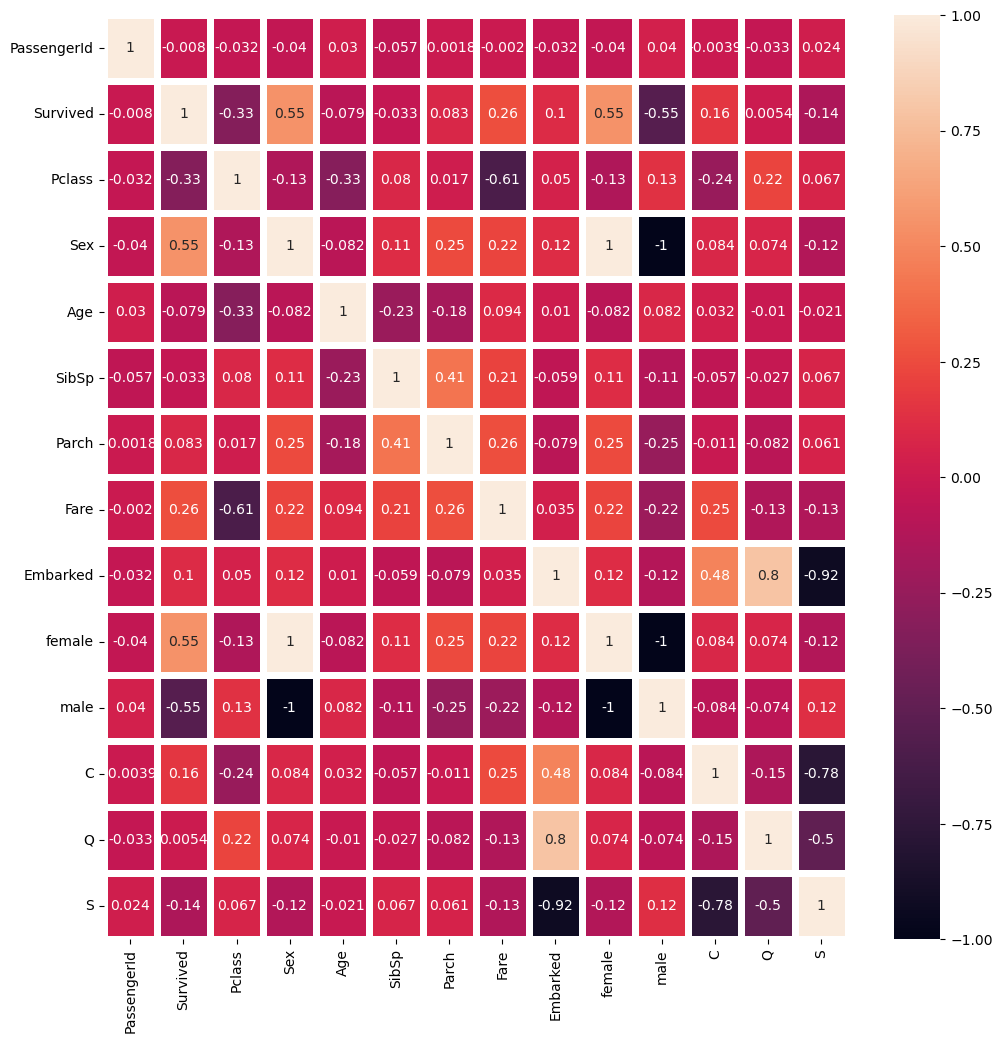

In [271]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(df_train.corr(),annot = True,linewidths=5,ax=ax)

### Feature Engineering

In [272]:
df_train["n_re"] = df_train["SibSp"]+df_train["Parch"]

In [273]:
df_test["n_re"] = df_test["SibSp"]+df_test["Parch"]

In [274]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,n_re
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,1,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1,0,0,0,1,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,0,1,0


### Checking relation between survival chances and no of relations on board

In [275]:
contigency6= pd.crosstab(df_train['n_re'], df_train['Survived']) 
contigency6

Survived,0.0,1.0
n_re,,
0,374,160
1,72,88
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [276]:
chi2_contingency(contigency6)

Chi2ContingencyResult(statistic=81.48564062842057, pvalue=2.454545451872461e-14, dof=8, expected_freq=array([[330.51409245, 203.48590755],
       [ 99.03043968,  60.96956032],
       [ 63.1319053 ,  38.8680947 ],
       [ 17.94926719,  11.05073281],
       [  9.28410372,   5.71589628],
       [ 13.61668546,   8.38331454],
       [  7.42728298,   4.57271702],
       [  3.71364149,   2.28635851],
       [  4.33258174,   2.66741826]]))

<Axes: xlabel='n_re', ylabel='Survived'>

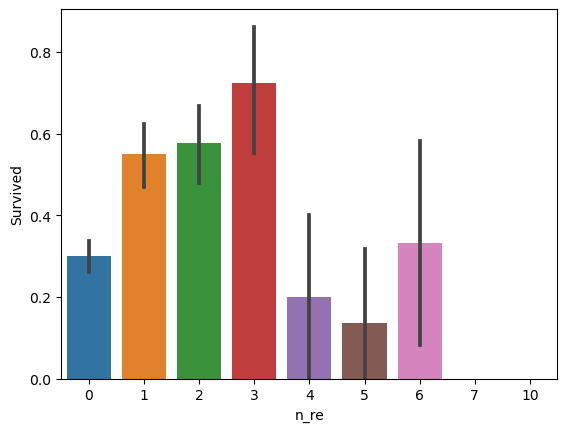

In [277]:
sns.barplot(x="n_re",y="Survived",data=df_train)

<Axes: >

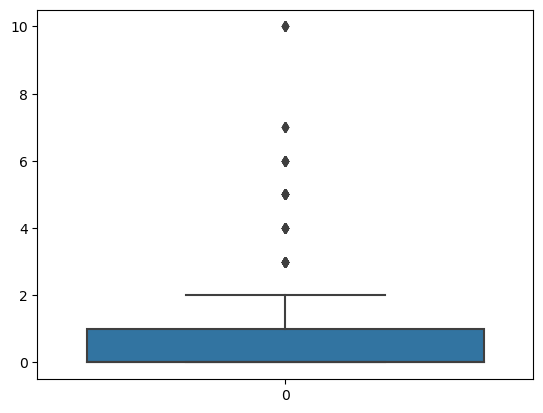

In [278]:
sns.boxplot(df_train["n_re"])

<Axes: xlabel='n_re', ylabel='Count'>

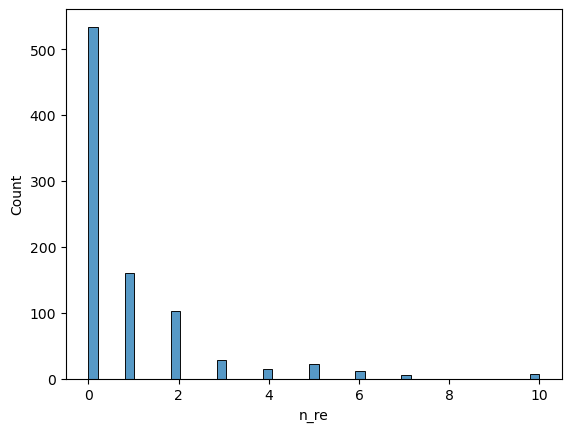

In [279]:
sns.histplot(df_train["n_re"])

<Axes: xlabel='n_re', ylabel='Survived'>

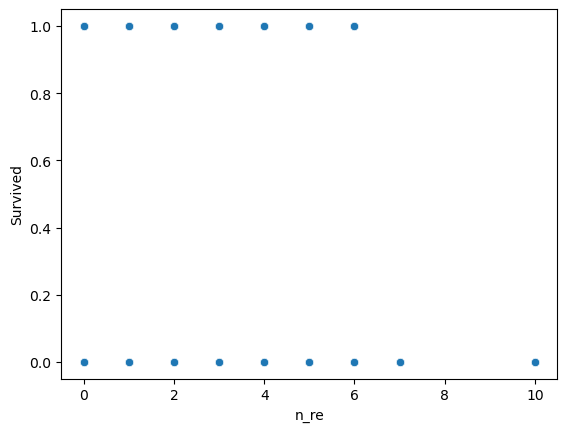

In [280]:
sns.scatterplot(x="n_re",y="Survived",data=df_train)

In [281]:
df_train[df_train["n_re"]==10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,n_re
159,160,0.0,3,"Sage, Master. Thomas Henry",0,29.881138,8,2,CA. 2343,69.55,0,0,1,0,0,1,10
180,181,0.0,3,"Sage, Miss. Constance Gladys",1,29.881138,8,2,CA. 2343,69.55,0,1,0,0,0,1,10
201,202,0.0,3,"Sage, Mr. Frederick",0,29.881138,8,2,CA. 2343,69.55,0,0,1,0,0,1,10
324,325,0.0,3,"Sage, Mr. George John Jr",0,29.881138,8,2,CA. 2343,69.55,0,0,1,0,0,1,10
792,793,0.0,3,"Sage, Miss. Stella Anna",1,29.881138,8,2,CA. 2343,69.55,0,1,0,0,0,1,10
846,847,0.0,3,"Sage, Mr. Douglas Bullen",0,29.881138,8,2,CA. 2343,69.55,0,0,1,0,0,1,10
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,29.881138,8,2,CA. 2343,69.55,0,1,0,0,0,1,10


In [282]:
df_train.drop([159,180,201,324,792,846,863],inplace=True)

In [283]:
df_train[df_train["n_re"]==10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S,n_re


# ------------------------------------------------------------------------------

# Model Building

# Logistic Regression

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
scale = StandardScaler()

In [286]:
Xtrain = df_train[["Pclass","Sex","Age","n_re","C","Q"]]

In [287]:
Xtrain_scale = scale.fit(Xtrain).transform(Xtrain)

In [288]:
Ytrain = df_train["Survived"]

In [289]:
from sklearn.model_selection import train_test_split
X_train, X_cv, Y_train, Y_cv = train_test_split( Xtrain_scale, Ytrain, test_size=0.3, random_state=4)

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
lr = LogisticRegression(C=0.01)

In [292]:
lr.fit(X_train,Y_train)

LogisticRegression(C=0.01)

In [293]:
Y_train_pred = lr.predict(X_train)

In [294]:
Y_train_pred[0:10]

array([0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])

In [295]:
Y_cv_pred = lr.predict(X_cv)
Y_cv_pred[0:10]

array([0., 0., 0., 1., 0., 1., 1., 0., 0., 0.])

### Logistic Regression model evaluation

In [296]:
from sklearn.metrics import log_loss

In [297]:
log_loss(Y_train,Y_train_pred)

7.431077890288764

In [298]:
log_loss(Y_cv,Y_cv_pred)

6.143804554963151

### Predicting Test dataset

In [299]:
Xtest = df_test[["Pclass","Sex","Age","n_re","C","Q"]]

In [300]:
scale = StandardScaler()

In [301]:
Xtest_scale = scale.fit(Xtest).transform(Xtest)

In [302]:
Ytest_pred = lr.predict(Xtest_scale)
Ytest_pred[0:10]

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

In [303]:
test_predictions = pd.DataFrame(Ytest_pred)

In [304]:
test_predictions.columns = ["Survived"]

In [305]:
test_predictions.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [306]:
test_id = df_test[["PassengerId"]].reset_index(drop=True)

In [307]:
final_lr = pd.concat([test_id,test_predictions],axis=1)

In [308]:
final_lr.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [309]:
final_lr.to_csv("m1.csv",index=False)

In [310]:
df_train.to_csv("df_train.csv")

In [311]:
df_test.to_csv("df_test.csv")

## Random forest classifier

In [312]:
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [313]:
df_tr["Sex"].replace(["male","female"],[0,1],inplace=True)

C:\Users\saima\AppData\Local\Temp\ipykernel_12600\1379951034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr["Sex"].replace(["male","female"],[0,1],inplace=True)


In [314]:
df_te["Sex"].replace(["male","female"],[0,1],inplace=True)

C:\Users\saima\AppData\Local\Temp\ipykernel_12600\3545546738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_te["Sex"].replace(["male","female"],[0,1],inplace=True)


In [315]:
df_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S


In [316]:
pclass = pd.get_dummies(df_tr["Pclass"])
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [317]:
df_tr = pd.concat([df_tr,pclass],axis=1)
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1,2,3
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [319]:
df_tr.rename(columns = {2:"p2",3:"p3"},inplace=True)
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,p1,p2,p3
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1


In [320]:
pclass = pd.get_dummies(df_te["Pclass"])
pclass.head()

,1,2,3
891,0,0,1
892,0,0,1
893,0,1,0
894,0,0,1
895,0,0,1


In [321]:
df_te = pd.concat([df_te,pclass],axis=1)
df_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,1,2,3
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,0,1
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1


In [322]:
df_te.rename(columns = {1:"p1",2:"p2",3:"p3"},inplace=True)
df_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,p1,p2,p3
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,0,1
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1


In [323]:
embark = pd.get_dummies(df_tr["Embarked"])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [324]:
df_tr = pd.concat([df_tr,embark],axis=1)
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,p1,p2,p3,C,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,0,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1


In [325]:
embark = pd.get_dummies(df_te["Embarked"])
embark.head()

,C,Q,S
891,0,1,0
892,0,0,1
893,0,1,0
894,0,0,1
895,0,0,1


In [326]:
df_te = pd.concat([df_te,embark],axis=1)
df_te.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,p1,p2,p3,C,Q,S
891,892,NaN,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,Q,0,0,1,0,1,0
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,S,0,0,1,0,0,1
893,894,NaN,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,Q,0,1,0,0,1,0
894,895,NaN,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,S,0,0,1,0,0,1
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,S,0,0,1,0,0,1


In [327]:
df_tr["n_re"] = df_tr["SibSp"]+df_tr["Parch"]
df_te["n_re"] = df_te["SibSp"]+df_te["Parch"]

In [328]:
df_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,p1,p2,p3,C,Q,S,n_re
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,0,1,0,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,0,1,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,0,0,0,1,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,0,1,0,0,1,0


In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
f = RandomForestClassifier(criterion = "entropy")

In [331]:
X = df_tr[["Sex","Age","Fare","C","Q","S","n_re","p1","p2","p3"]]

In [332]:
X.head()

,Sex,Age,Fare,C,Q,S,n_re,p1,p2,p3
0,0,22.0,7.2500,0,0,1,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,1,0,0
2,1,26.0,7.9250,0,0,1,0,0,0,1
3,1,35.0,53.1000,0,0,1,1,1,0,0
4,0,35.0,8.0500,0,0,1,0,0,0,1


In [333]:
Y = df_tr["Survived"]

In [334]:
f.fit(X,Y)

RandomForestClassifier(criterion='entropy')

In [335]:
ypred = f.predict(X)

In [336]:
ypred[0:5]

array([0., 1., 1., 1., 0.])

In [337]:
log_loss(Y,ypred)

0.6472485457080523

In [338]:
X = df_te[["Sex","Age","Fare","C","Q","S","n_re","p1","p2","p3"]]

In [339]:
ypredtest = f.predict(X)

In [340]:
ypredtest[0:5]

array([0., 0., 0., 1., 1.])

In [341]:
test_predictions = pd.DataFrame(ypredtest)
test_predictions.head()

,0
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [342]:
test_predictions.columns = ["Survived"]
test_predictions.head()

,Survived
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [343]:
test_id = df_te[["PassengerId"]].reset_index(drop=True)

In [344]:
final_rf = pd.concat([test_id,test_predictions],axis=1)
final_rf.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0


In [345]:
final_rf.to_csv("rf.csv",index=False)